<a href="https://colab.research.google.com/github/AnnabelWei/Recommenders/blob/main/Recommender_System_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommender Systems Data Preprocessing

In this notebook, we will preprocess the movies dataset to prepare it for building various recommendation systems. The preprocessing steps will ensure that the data is clean, relevant, and structured in a way that can be directly used for modeling.

## Table of Contents:
1. **Initial Steps**
    - Data Download
2. **Data Loading**
    - Load the relevant datasets.
3. **Initial Data Exploration**
    - Understand the structure, columns, and types of data present.
4. **Data Cleaning**
    - Handle missing values.
    - Remove duplicates.
    - Handle outliers and anomalies.
5. **Data Merging**
    - Merge the datasets into a unified dataframe.
6. **Feature Engineering**
    - Create new features that might be relevant for recommendation systems.
7. **Saving the Preprocessed Data**
    - Save the cleaned and preprocessed data for further modeling.


## 1. Data Downloading

In this section, we will do data downloading from kaggle (must upload your kaggle api)

In [ ]:
### data downloading from kaggle (must upload kaggle api)
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d "rounakbanik/the-movies-dataset"

# unzipping data
!unzip /content/the-movies-dataset.zip

## 2. Data Loading

In this section, we will load the datasets that are relevant for our recommendation systems. We'll start by importing the necessary libraries and then loading each dataset one by one.

In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the datasets
keywords_df = pd.read_csv('keywords.csv')
links_df = pd.read_csv('links.csv')
links_small_df = pd.read_csv('links_small.csv')
movies_metadata_df = pd.read_csv('movies_metadata.csv')
ratings_small_df = pd.read_csv('ratings_small.csv')

# Display the first few rows of each dataset to get an initial understanding
keywords_df.head(), links_df.head(), links_small_df.head(), movies_metadata_df.head(), ratings_small_df.head()

<ipython-input-2-be9ba6d353fa>:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv('movies_metadata.csv')


(      id                                           keywords
 0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
 1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
 2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
 3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
 4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...,
    movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
    movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
    adult                              belongs_to_collection    budget  \
 0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
 1  False                                                NaN  65000000   
 2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect... 

## 3. Initial Data Exploration

Before diving into preprocessing, it's essential to understand the nature of our data. This step will involve:
- Checking the shape of each dataset to know the number of rows and columns.
- Understanding the data types of each column.


In [ ]:
# Checking the shape of each dataset
dataset_shapes = {
    'keywords_df': keywords_df.shape,
    'links_df': links_df.shape,
    'links_small_df': links_small_df.shape,
    'movies_metadata_df': movies_metadata_df.shape,
    'ratings_small_df': ratings_small_df.shape
}

# Understanding the data types of each column
data_types = {
    'keywords_df': keywords_df.dtypes,
    'links_df': links_df.dtypes,
    'links_small_df': links_small_df.dtypes,
    'movies_metadata_df': movies_metadata_df.dtypes,
    'ratings_small_df': ratings_small_df.dtypes
}

dataset_shapes, data_types['keywords_df'], data_types['links_df'], data_types['links_small_df'], data_types['movies_metadata_df'], data_types['ratings_small_df']

({'keywords_df': (46419, 2),
  'links_df': (45843, 3),
  'links_small_df': (9125, 3),
  'movies_metadata_df': (45466, 24),
  'ratings_small_df': (100004, 4)},
 id           int64
 keywords    object
 dtype: object,
 movieId      int64
 imdbId       int64
 tmdbId     float64
 dtype: object,
 movieId      int64
 imdbId       int64
 tmdbId     float64
 dtype: object,
 adult                     object
 belongs_to_collection     object
 budget                    object
 genres                    object
 homepage                  object
 id                        object
 imdb_id                   object
 original_language         object
 original_title            object
 overview                  object
 popularity                object
 poster_path               object
 production_companies      object
 production_countries      object
 release_date              object
 revenue                  float64
 runtime                  float64
 spoken_languages          object
 status              

## 4. Data Cleaning

Data cleaning is a crucial step in the preprocessing pipeline. Ensuring that our data is clean and free from inconsistencies will help in building robust recommendation models. In this section, we will:
- Handle missing values.
- Convert data types where necessary.
- Remove duplicates.
- Handle outliers and anomalies.

###  Handling Missing Values

We'll start by identifying the number of missing values in each dataset. Based on the nature of the missing data, we'll decide on the best strategy to handle them.

In [ ]:
# Identifying the number of missing values in each dataset
missing_values = {
    'keywords_df': keywords_df.isnull().sum(),
    'links_df': links_df.isnull().sum(),
    'links_small_df': links_small_df.isnull().sum(),
    'movies_metadata_df': movies_metadata_df.isnull().sum(),
    'ratings_small_df': ratings_small_df.isnull().sum()
}

missing_values

{'keywords_df': id          0
 keywords    0
 dtype: int64,
 'links_df': movieId      0
 imdbId       0
 tmdbId     219
 dtype: int64,
 'links_small_df': movieId     0
 imdbId      0
 tmdbId     13
 dtype: int64,
 'movies_metadata_df': adult                        0
 belongs_to_collection    40972
 budget                       0
 genres                       0
 homepage                 37684
 id                           0
 imdb_id                     17
 original_language           11
 original_title               0
 overview                   954
 popularity                   5
 poster_path                386
 production_companies         3
 production_countries         3
 release_date                87
 revenue                      6
 runtime                    263
 spoken_languages             6
 status                      87
 tagline                  25054
 title                        6
 video                        6
 vote_average                 6
 vote_count                  

In [ ]:
# Handling missing values for links_df and links_small_df
links_df.dropna(subset=['tmdbId'], inplace=True)
links_small_df.dropna(subset=['tmdbId'], inplace=True)

# Handling missing values for movies_metadata_df
movies_metadata_df['belongs_to_collection'].fillna('Unknown', inplace=True)
movies_metadata_df['homepage'].fillna('Not Available', inplace=True)
movies_metadata_df['tagline'].fillna('Not Available', inplace=True)
movies_metadata_df['overview'].fillna('Not Available', inplace=True)
movies_metadata_df['poster_path'].fillna('Not Available', inplace=True)
movies_metadata_df['release_date'].fillna(movies_metadata_df['release_date'].mode()[0], inplace=True)
movies_metadata_df['runtime'].fillna(movies_metadata_df['runtime'].median(), inplace=True)

### drop all left cuz they are not very important
movies_metadata_df.dropna(inplace=True)

# Checking the number of missing values after handling
missing_values_after = {
    'links_df': links_df.isnull().sum(),
    'links_small_df': links_small_df.isnull().sum(),
    'movies_metadata_df': movies_metadata_df.isnull().sum()
}

missing_values_after

{'links_df': movieId    0
 imdbId     0
 tmdbId     0
 dtype: int64,
 'links_small_df': movieId    0
 imdbId     0
 tmdbId     0
 dtype: int64,
 'movies_metadata_df': adult                    0
 belongs_to_collection    0
 budget                   0
 genres                   0
 homepage                 0
 id                       0
 imdb_id                  0
 original_language        0
 original_title           0
 overview                 0
 popularity               0
 poster_path              0
 production_companies     0
 production_countries     0
 release_date             0
 revenue                  0
 runtime                  0
 spoken_languages         0
 status                   0
 tagline                  0
 title                    0
 video                    0
 vote_average             0
 vote_count               0
 dtype: int64}

### Convert Data Types

Certain columns in the `movies_metadata_df` dataset have data types that might not be appropriate for further analysis. We'll identify these columns and convert them to suitable data types.

In [ ]:
# Convert 'budget' to integer type
movies_metadata_df['budget'] = movies_metadata_df['budget'].astype(int, errors='ignore')

# Convert 'id' to integer type after removing any non-numeric rows
movies_metadata_df = movies_metadata_df[movies_metadata_df['id'].str.isnumeric()]
movies_metadata_df['id'] = movies_metadata_df['id'].astype(int)

# Convert 'popularity' to float type
movies_metadata_df['popularity'] = movies_metadata_df['popularity'].astype(float, errors='ignore')

# Checking the data types after conversion
movies_metadata_df[['budget', 'id', 'popularity']].dtypes

budget          int64
id              int64
popularity    float64
dtype: object

In [ ]:
# Remove Duplicates
keywords_df.drop_duplicates(inplace=True)
links_df.drop_duplicates(inplace=True)
links_small_df.drop_duplicates(inplace=True)
movies_metadata_df.drop_duplicates(inplace=True)
ratings_small_df.drop_duplicates(inplace=True)

# Check the shape of datasets after removing duplicates
dataset_shapes_after_dedup = {
    'keywords_df': keywords_df.shape,
    'links_df': links_df.shape,
    'links_small_df': links_small_df.shape,
    'movies_metadata_df': movies_metadata_df.shape,
    'ratings_small_df': ratings_small_df.shape
}

dataset_shapes_after_dedup

{'keywords_df': (45432, 2),
 'links_df': (45624, 3),
 'links_small_df': (9112, 3),
 'movies_metadata_df': (45334, 24),
 'ratings_small_df': (100004, 4)}

###  Handle Outliers and Anomalies

Outliers can significantly impact the performance of certain algorithms. To ensure our recommendation models work effectively, we'll identify and handle outliers in our numerical columns. We'll start by visualizing the distribution of these columns to pinpoint any potential outliers.

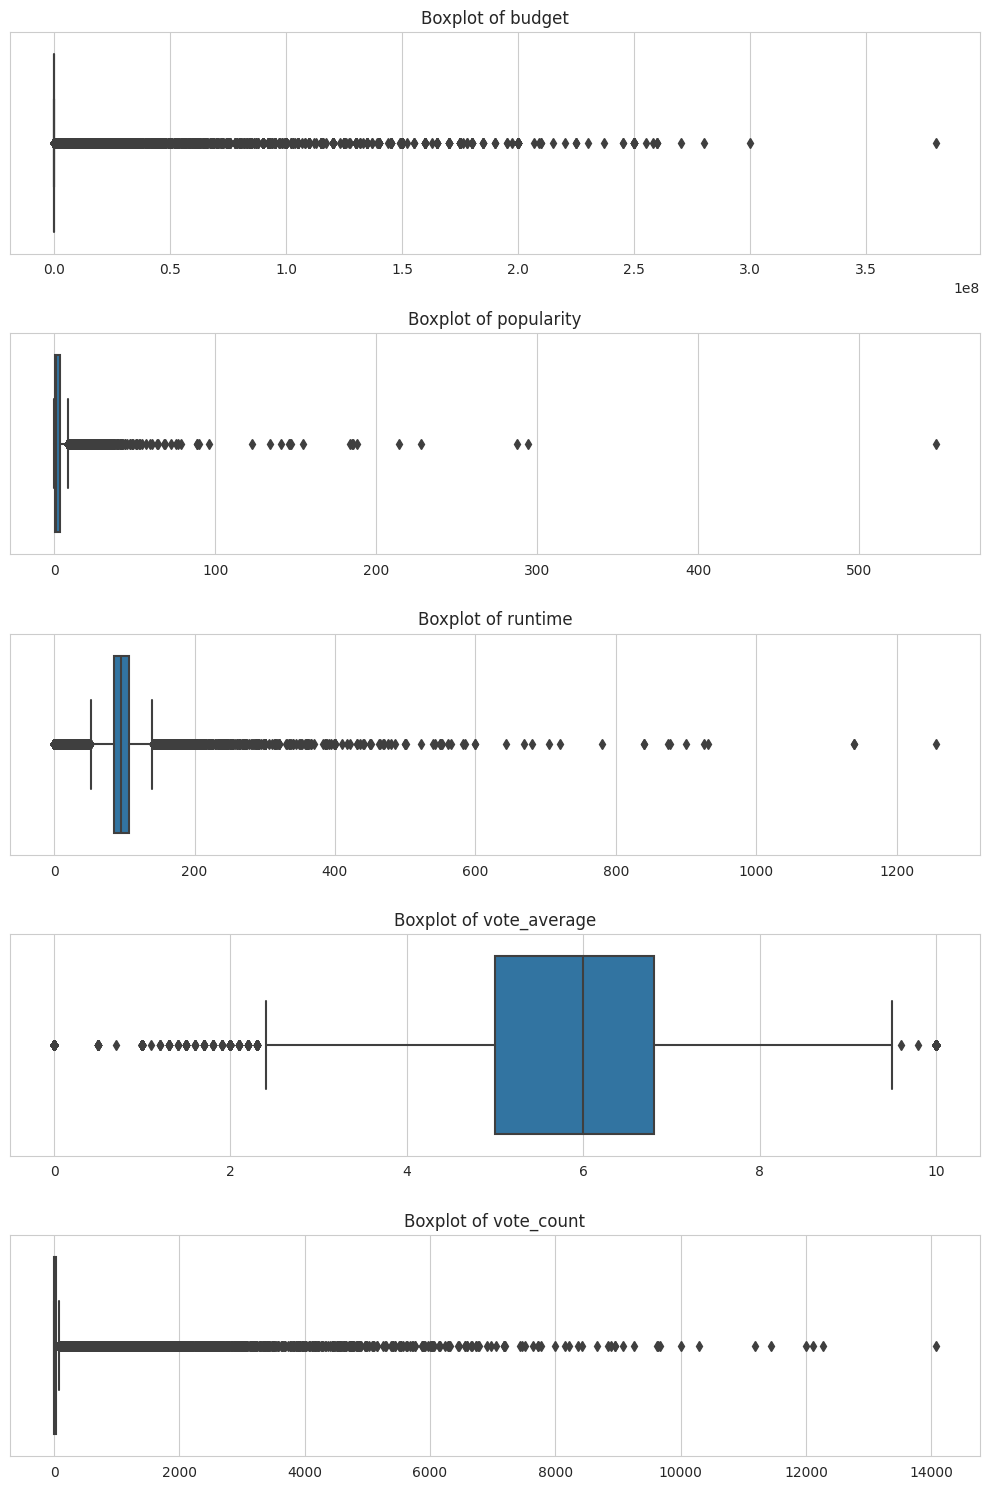

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

numerical_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 15))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=movies_metadata_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Handling outliers for 'budget'
median_budget = movies_metadata_df[movies_metadata_df['budget'] > 0]['budget'].median()
movies_metadata_df['budget'] = movies_metadata_df['budget'].replace(0, median_budget)
upper_limit_budget = movies_metadata_df['budget'].quantile(0.99)


movies_metadata_df['budget'] = movies_metadata_df['budget'].clip(upper=upper_limit_budget)

# Handling outliers for 'popularity'
upper_limit_popularity = movies_metadata_df['popularity'].quantile(0.99)
movies_metadata_df['popularity'] = movies_metadata_df['popularity'].clip(upper=upper_limit_popularity)

# Handling outliers for 'runtime'
median_runtime = movies_metadata_df[movies_metadata_df['runtime'] > 0]['runtime'].median()
movies_metadata_df['runtime'] = movies_metadata_df['runtime'].replace(0, median_runtime)
upper_limit_runtime = movies_metadata_df['runtime'].quantile(0.99)
movies_metadata_df['runtime'] = movies_metadata_df['runtime'].clip(upper=upper_limit_runtime)

# Handling outliers for 'vote_count'
upper_limit_vote_count = movies_metadata_df['vote_count'].quantile(0.99)
movies_metadata_df['vote_count'] = movies_metadata_df['vote_count'].clip(upper=upper_limit_vote_count)

# Display the summary statistics after handling outliers
movies_metadata_df[numerical_columns].describe()

,budget,popularity,runtime,vote_average,vote_count
count,4.533400e+04,45334.000000,45334.000000,45334.000000,45334.000000
mean,1.015456e+07,2.776996,96.413707,5.622308,91.102764
std,1.162901e+07,3.668866,25.864844,1.918502,299.347379
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,8.000000e+06,0.388831,87.000000,5.000000,3.000000
50%,8.000000e+06,1.131130,95.000000,6.000000,10.000000
75%,8.000000e+06,3.695311,107.000000,6.800000,34.000000
max,8.700000e+07,17.018782,185.000000,10.000000,2187.680000


## 5. Merging Datasets

To create a unified dataset for our recommendation models, we'll merge the datasets based on movie IDs. Before merging, we'll ensure that the columns used for merging ('id' in `movies_metadata_df` and 'tmdbId' in `links_df` and `links_small_df`) have consistent data types.

In [ ]:
# Ensuring consistent data types for merging columns
movies_metadata_df['id'] = movies_metadata_df['id'].astype(float)
links_df['tmdbId'] = links_df['tmdbId'].astype(float)
links_small_df['tmdbId'] = links_small_df['tmdbId'].astype(float)

# Merging movies_metadata_df with links_df on 'id' and 'tmdbId'
merged_df = movies_metadata_df.merge(links_df, left_on='id', right_on='tmdbId', how='inner')

# Merging the above result with ratings_small_df on 'movieId'
final_merged_df = merged_df.merge(ratings_small_df, on='movieId', how='inner')

# Displaying the shape and first few rows of the final merged dataset
final_merged_df.shape, final_merged_df.head()

((99827, 30),
    adult                              belongs_to_collection    budget  \
 0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
 1  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
 2  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
 3  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
 4  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
 
                                               genres  \
 0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 1  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 3  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 4  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 
                                homepage     id    imdb_id original_language  \
 0  http://toystory.disney.com/toy-story  862.0  tt0114709                en   
 1  http://toystory.disney.com/toy-s

## 6. Feature Selection

Given our goal of building recommendation models, we'll retain only the columns that provide meaningful information for generating recommendations. Specifically, we'll keep columns related to movie details, user ratings, and identifiers. We'll drop any redundant or irrelevant columns.

In [ ]:
# Selecting relevant columns
selected_columns = ['id', 'title', 'genres', 'overview', 'popularity', 'vote_average', 'vote_count', 'userId', 'rating']
final_df = final_merged_df[selected_columns]

# Displaying the shape and first few rows of the selected dataset
final_df.shape, final_df.head()

((99827, 9),
       id      title                                             genres  \
 0  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 1  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 2  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 3  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 4  862.0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
 
                                             overview  popularity  \
 0  Led by Woody, Andy's toys live happily in his ...   17.018782   
 1  Led by Woody, Andy's toys live happily in his ...   17.018782   
 2  Led by Woody, Andy's toys live happily in his ...   17.018782   
 3  Led by Woody, Andy's toys live happily in his ...   17.018782   
 4  Led by Woody, Andy's toys live happily in his ...   17.018782   
 
    vote_average  vote_count  userId  rating  
 0           7.7     2187.68       7     3.0  
 1           7.7     2187

##  Handling Missing Values (if got created after merging)

Missing values can impact the performance of recommendation algorithms. We'll identify any missing values in our dataset and decide on a strategy to handle them, whether it's imputation or removal.

In [ ]:
# Checking for missing values in the selected dataset
missing_values_final = final_df.isnull().sum()
missing_values_final

id              0
title           0
genres          0
overview        0
popularity      0
vote_average    0
vote_count      0
userId          0
rating          0
dtype: int64

## 8. Save Preprocessed Data

We'll save the preprocessed dataset to a single file. This will facilitate easy access and use in the subsequent steps of building recommendation models.

In [ ]:
# Saving the preprocessed data to a CSV file
preprocessed_file_path = 'preprocessed_movie_data.csv'
final_df.to_csv(preprocessed_file_path, index=False)

# Confirming the file has been saved
preprocessed_file_path

'preprocessed_movie_data.csv'